#K-Means Clustering 

###Output of Example Code (make_blobs) - Plot-Kmeans.py (use interactive generated data)

interactive(children=(Dropdown(description='frame', options=(0, 50), value=0), Dropdown(description='n_cluster…

<function __main__.plot_kmeans_interactive.<locals>._kmeans_step(frame=0, n_clusters=4)>

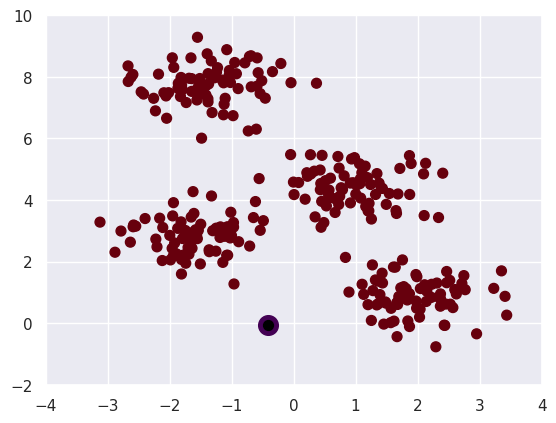

In [1]:
# Interactive Kmeans
# matplotlib inline

import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4, random_state=0, 
                      cluster_std=0.60)

    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Reds_r', 
                    vmin=0, vmax=n_clusters - 1)

    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c=np.arange(
            centers.shape[0]), s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='black', s=50)

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)
            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                   for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)
        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid", 
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means", 
                     ha='right', va='top', size=14)

    return interact(_kmeans_step, frame=[0, 50], n_clusters=[min_clusters, max_clusters])

plot_kmeans_interactive()


###Output of Example Code - Plot-Kmeans-1.py (use digit data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 7 4 ... 4 2 6]


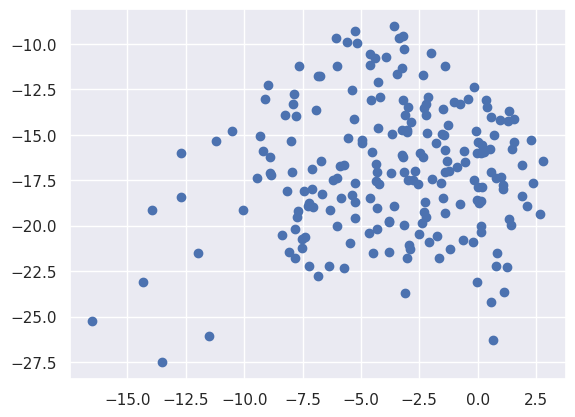

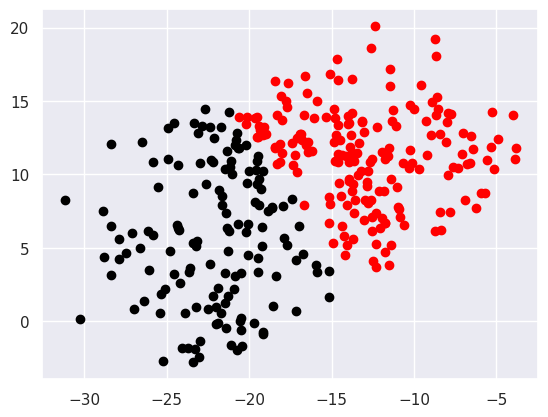

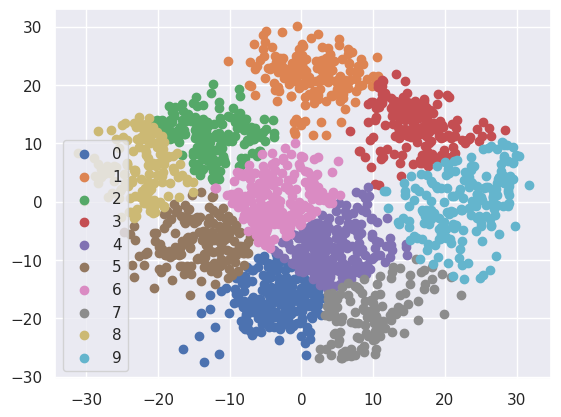

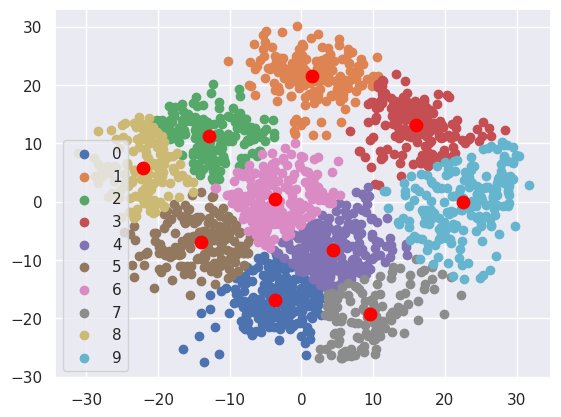

In [2]:
# Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load Data
data = load_digits().data
pca = PCA(2)

# Transform the data
df = pca.fit_transform(data)
df.shape

# Initialize the class object - for 10 clusters
kmeans = KMeans(n_clusters=10)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# Filter rows of original data
filtered_label0 = df[label == 0]

# Plotting the results
plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1])
plt.show()

# PLOTTING ADDITIONAL KMEANS CLUSTERS
# Filter rows of original data
filtered_label2 = df[label == 2]
filtered_label8 = df[label == 8]

# Plotting the results - plotting 2 clusters
plt.scatter(filtered_label2[:, 0], filtered_label2[:, 1], color='red')
plt.scatter(filtered_label8[:, 0], filtered_label8[:, 1], color='black')
plt.show()

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.legend()
plt.show()

# PLOTTING THE CLUSTER CENTROIDS
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.show()


###Output of Iris Dataset - (Number cluster = 2, 3, 4) - 3 output

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


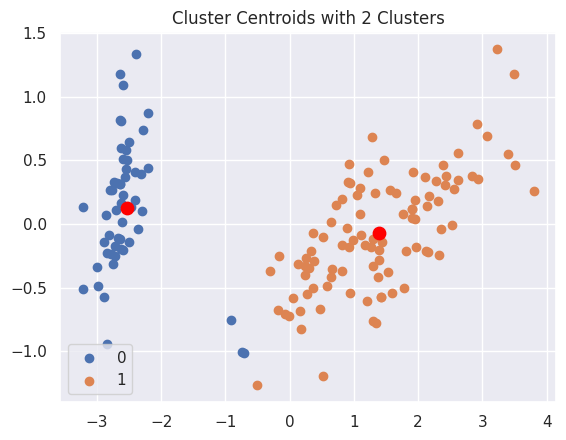

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


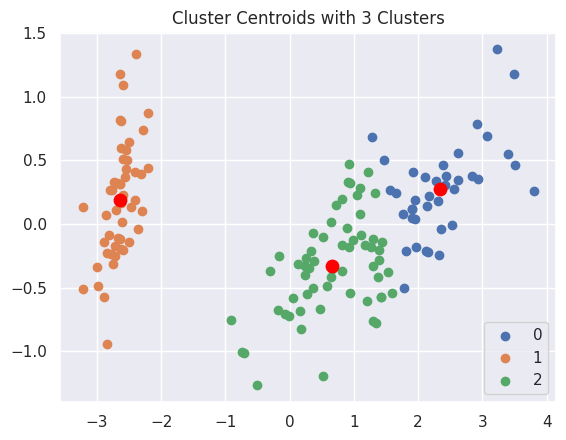

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 3 0 0 2 0 0 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 3 3 0 0 0 3 0 0 3 3 3
 3 3]


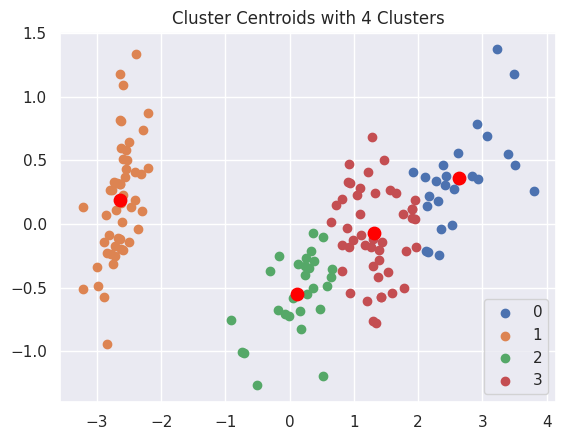

In [3]:
# Importing required modules
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load Data
data = load_iris().data
pca = PCA(2)

# Transform the data
df = pca.fit_transform(data)
df.shape

# NUMBER OF CLUSTERS = 2
# Initialize the class object 
kmeans = KMeans(n_clusters=2)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 2 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 2 Clusters")
plt.show()

# NUMBER OF CLUSTERS = 3
# Initialize the class object 
kmeans = KMeans(n_clusters=3)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 3 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 3 Clusters")
plt.show()

# NUMBER OF CLUSTERS = 4
# Initialize the class object 
kmeans = KMeans(n_clusters=4)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 4 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 4 Clusters")
plt.show()

### 3.	Output of Digit Dataset (Number cluster = 2, 3, 4) - 3 output

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 0 1 1]


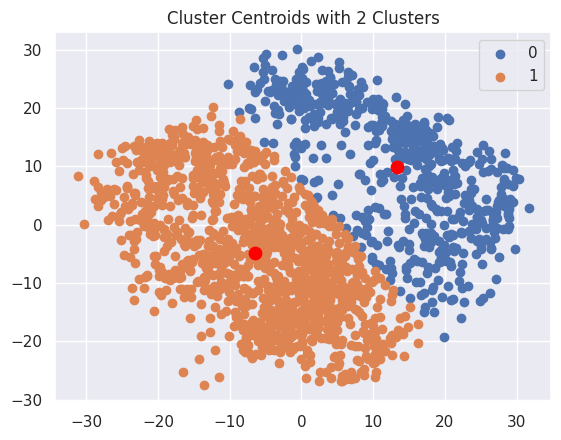

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 1 ... 1 0 0]


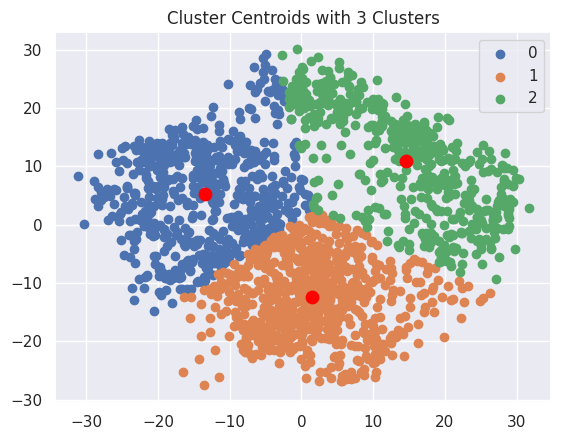

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 0 2 2]


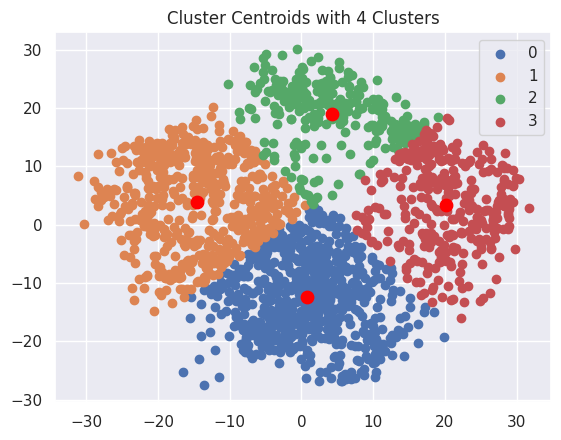

In [4]:
# Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load Data
data = load_digits().data
pca = PCA(2)

# Transform the data
df = pca.fit_transform(data)
df.shape

# NUMBER OF CLUSTERS = 2
# Initialize the class object 
kmeans = KMeans(n_clusters=2)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 2 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 2 Clusters")
plt.show()

# NUMBER OF CLUSTERS = 3
# Initialize the class object 
kmeans = KMeans(n_clusters=3)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 3 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 3 Clusters")
plt.show()

# NUMBER OF CLUSTERS = 4
# Initialize the class object 
kmeans = KMeans(n_clusters=4)

# Predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

# PLOT ALL KMEANS CLUSTERS
# Getting unique labels
u_labels = np.unique(label)

# PLOTTING THE CLUSTER CENTROIDS - with 4 clusters
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='red')
plt.legend()
plt.title("Cluster Centroids with 4 Clusters")
plt.show()

# Hierarchical Clustering (Dendrogram)

Output of Example Code - make_blobs

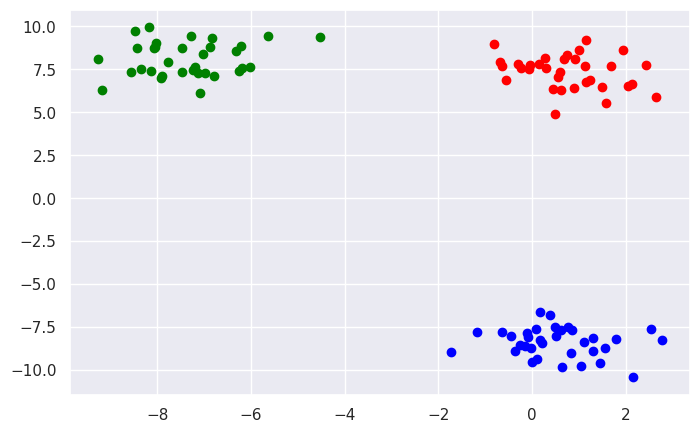

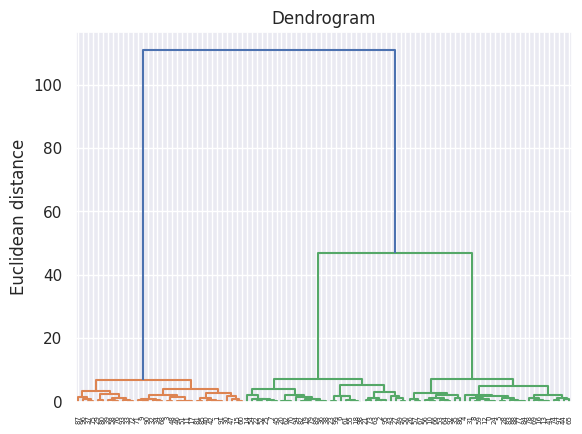

In [5]:
# Importing required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Getting the data ready
data = make_blobs()
df = data[0]  # Accessing the data points

# Selecting certain features based on which clustering is done
df = df[:, :2]  # Adjust the column indexing here if needed

# Creating the model
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Predicting the labels
labels = agg_clustering.fit_predict(df)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], c='red')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], c='blue')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], c='green')
plt.show()

# PLOTTING THE DENDROGRAM
# Linkage Matrix
Z = linkage(df, method='ward')

# Plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()


###Output of Iris Dataset - Plot-Hierarchical.py (use Iris data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


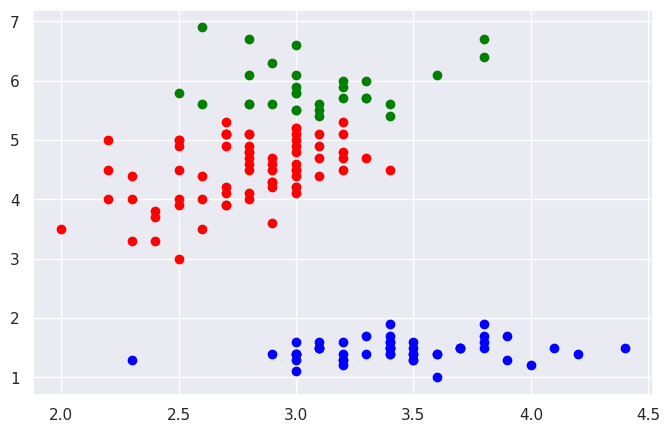

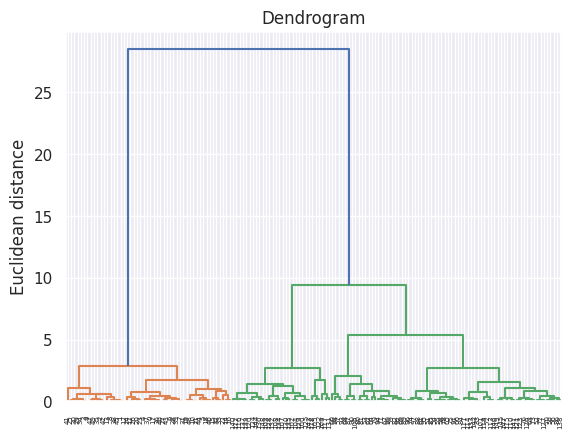

In [6]:
# Importing required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Getting the data ready
data = load_iris()
df = data.data

# Selecting certain features based on which clustering is done
df = df[:, 1:3]

# Creating the model
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Predicting the labels
labels = agg_clustering.fit_predict(df)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], c='red')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], c='blue')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], c='green')
plt.show()

# PLOTTING THE DENDROGRAM
# Linkage Matrix
Z = linkage(df, method='ward')

# Plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()


###Output of Digit Dataset  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


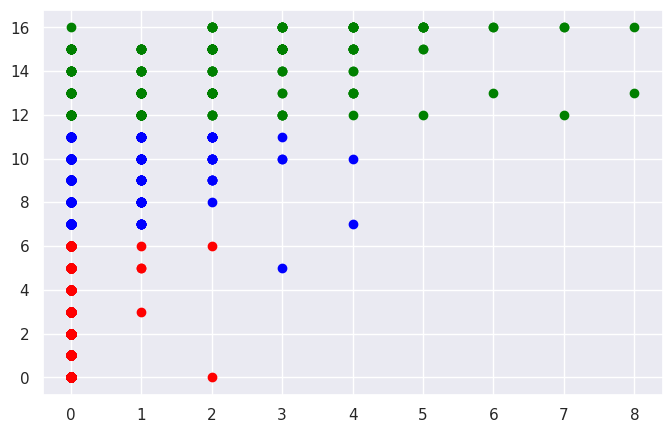

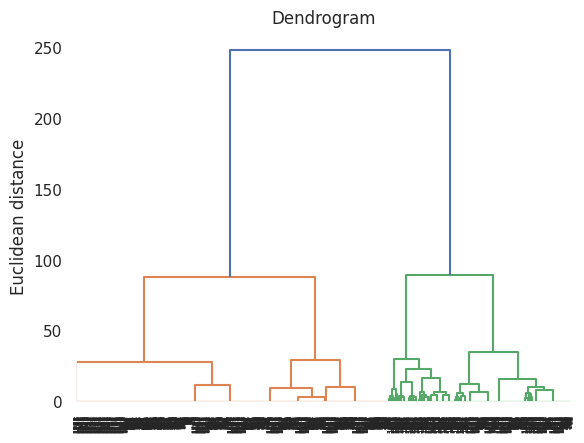

In [7]:
# Importing required libraries
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Getting the data ready
data = load_digits()
df = data.data

# Selecting certain features based on which clustering is done
df = df[:, 1:3]

# Creating the model
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Predicting the labels
labels = agg_clustering.fit_predict(df)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], c='red')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], c='blue')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], c='green')
plt.show()

# PLOTTING THE DENDROGRAM
# Linkage Matrix
Z = linkage(df, method='ward')

# Plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()


#Density Based Clustering

###Output of Example Code - plot_dbscan.py (use generated sample data make_blobs)

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


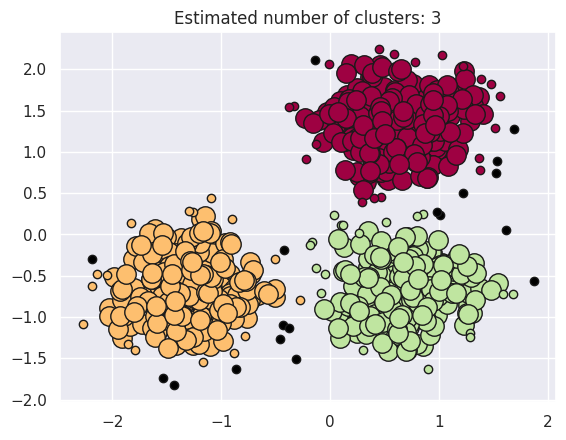

In [8]:
print(__doc__)
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

####################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers,
                           cluster_std=0.4,
                           random_state=0)
X = StandardScaler().fit_transform(X)

####################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

####################################################################
# Plot result
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

###Output of Iris Dataset (3 different min-points and epsilon) - 3 output



DBSCAN parameters: {'eps': 0.4, 'min_samples': 5}
Estimated number of clusters: 6
Estimated number of noise points: 66
Homogeneity: 0.618
Completeness: 0.448
V-measure: 0.519
Adjusted Rand Index: 0.366
Adjusted Mutual Information: 0.502
Silhouette Coefficient: 0.028



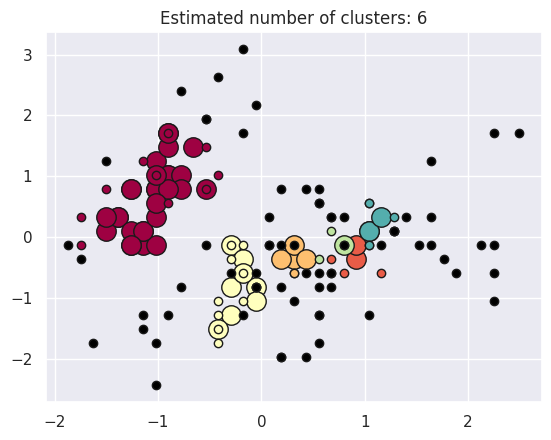


DBSCAN parameters: {'eps': 0.5, 'min_samples': 7}
Estimated number of clusters: 5
Estimated number of noise points: 46
Homogeneity: 0.669
Completeness: 0.472
V-measure: 0.554
Adjusted Rand Index: 0.468
Adjusted Mutual Information: 0.541
Silhouette Coefficient: 0.139



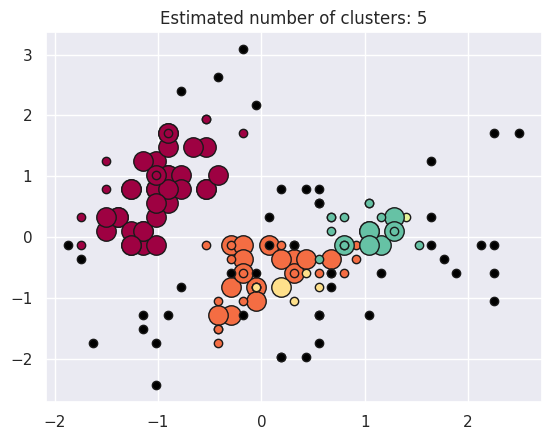


DBSCAN parameters: {'eps': 0.6, 'min_samples': 9}
Estimated number of clusters: 2
Estimated number of noise points: 34
Homogeneity: 0.501
Completeness: 0.523
V-measure: 0.511
Adjusted Rand Index: 0.442
Adjusted Mutual Information: 0.505
Silhouette Coefficient: 0.349



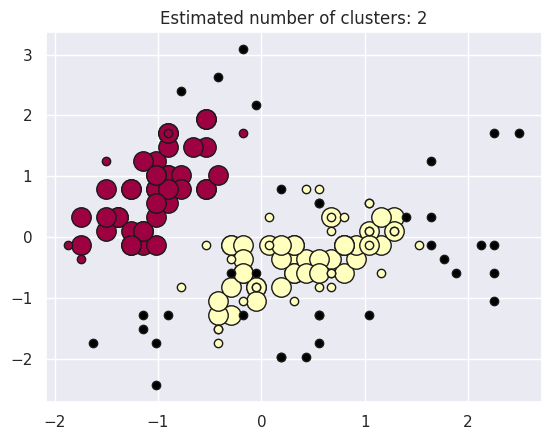

In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data

# Scale the features
X = StandardScaler().fit_transform(X)

# Define the parameter settings
param_settings = [
    {'eps': 0.4, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 7},
    {'eps': 0.6, 'min_samples': 9}
]

# Perform DBSCAN for each parameter setting
for params in param_settings:
    print("DBSCAN parameters:", params)
    # Compute DBSCAN
    db = DBSCAN(eps=params['eps'], min_samples=params['min_samples']).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    if n_clusters_ > 1:
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(iris.target, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(iris.target, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(iris.target, labels))
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    else:
        print("Insufficient number of clusters to compute evaluation metrics.")
    print()

    # Plot the result
    import matplotlib.pyplot as plt
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    print()

###Output of Digit Dataset (3 different parameter min-points and epsilon) - 3 output

DBSCAN parameters: {'eps': 2.0, 'min_samples': 5}
Estimated number of clusters: 3
Estimated number of noise points: 1778
Homogeneity: 0.011
Completeness: 0.356
V-measure: 0.021
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.014
Silhouette Coefficient: -0.106



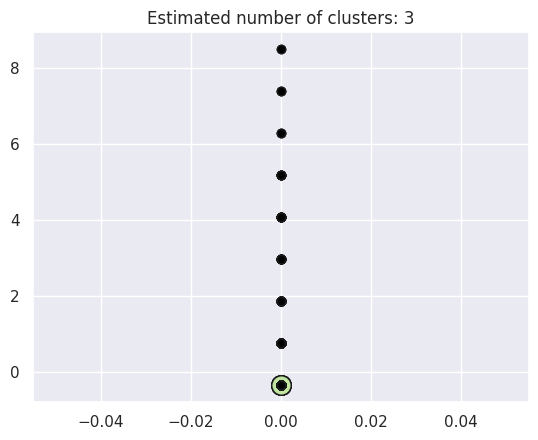


DBSCAN parameters: {'eps': 4.0, 'min_samples': 10}
Estimated number of clusters: 13
Estimated number of noise points: 1094
Homogeneity: 0.415
Completeness: 0.630
V-measure: 0.500
Adjusted Rand Index: 0.130
Adjusted Mutual Information: 0.491
Silhouette Coefficient: -0.071



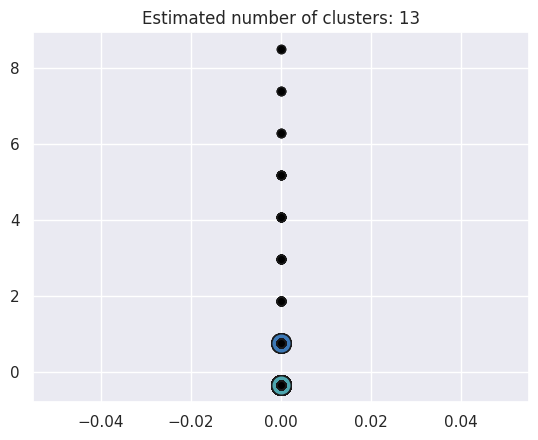


DBSCAN parameters: {'eps': 6.0, 'min_samples': 15}
Estimated number of clusters: 2
Estimated number of noise points: 129
Homogeneity: 0.019
Completeness: 0.139
V-measure: 0.034
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.030
Silhouette Coefficient: 0.207



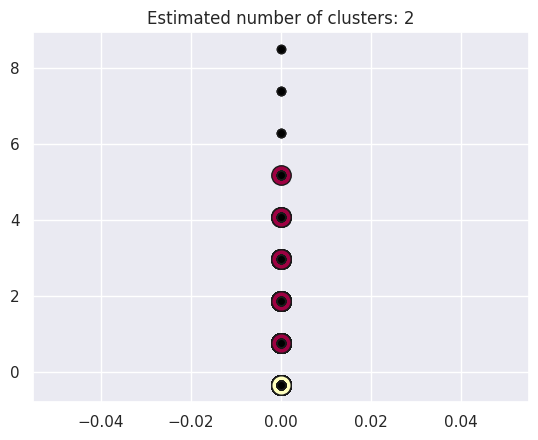

In [10]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data

# Scale the features
X = StandardScaler().fit_transform(X)

# Define the parameter settings 
# increasing the eps value or decreasing the min_samples value 
param_settings = [
    {'eps': 2.0, 'min_samples': 5},
    {'eps': 4.0, 'min_samples': 10},
    {'eps': 6.0, 'min_samples': 15}
]

# Perform DBSCAN for each parameter setting
for params in param_settings:
    print("DBSCAN parameters:", params)
    # Compute DBSCAN
    db = DBSCAN(eps=params['eps'], min_samples=params['min_samples']).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    if n_clusters_ > 1:
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(digits.target, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(digits.target, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(digits.target, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(digits.target, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(digits.target, labels))
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    else:
        print("Insufficient number of clusters to compute evaluation metrics.")
    print()

    # Plot the result
    import matplotlib.pyplot as plt
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    print()